In [14]:
#important library:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.regularizers import l2

In [4]:
ROOT = "/Users/test/Downloads/archive/"
TRAIN_DIR = 'train/'
TEST_DIR = 'test/'
BATCH_SIZE = 64
IMAGE_SIZE= (224, 224) 

In [6]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.1,
    zoom_range=0.1, 
    horizontal_flip=True, 
    fill_mode='nearest') 
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True, 
    fill_mode='nearest') 
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Create generators for loading images from directories
train_generator = train_datagen.flow_from_directory(
    ROOT + TRAIN_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# For test data, you can apply minimal augmentation or none at all
test_generator = test_datagen.flow_from_directory(
    ROOT + TEST_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


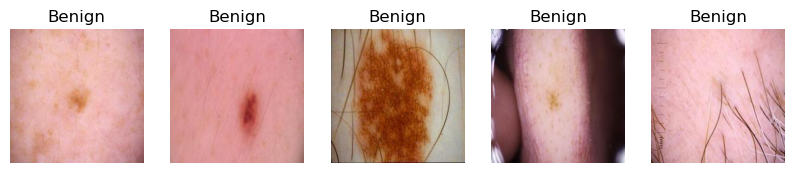

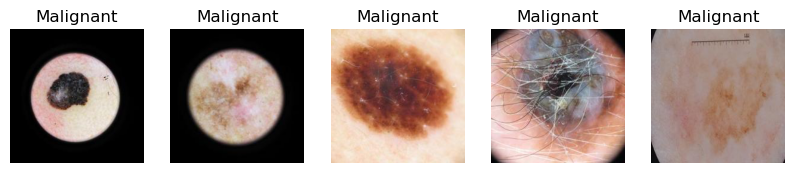

In [12]:

# Define the number of images to plot from each class
num_images_per_class = 5

# Get class indices
class_indices = test_generator.class_indices

# Inverse mapping of class indices to class labels
class_labels = {v: k for k, v in class_indices.items()}

# Plot images from each class
for class_index, class_label in class_labels.items():
    # Find the first num_images_per_class images belonging to the current class
    class_images = [image for image, label in zip(train_generator[0][0], train_generator[0][1]) if label[class_index] == 1][:num_images_per_class]
    
    # Plot the images
    plt.figure(figsize=(10, 5))
    for i, image in enumerate(class_images):
        plt.subplot(1, num_images_per_class, i + 1)
        plt.imshow(image)
        plt.title(class_label)
        plt.axis('off')
    plt.show()

In [15]:
# Define the input shape
input_shape = (224, 224, 3) 

# Load pre-trained InceptionV3 model
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in inception_model.layers:
    layer.trainable = False
model = tf.keras.models.Sequential([
    inception_model,
    tf.keras.layers.BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.01),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.006)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax',kernel_regularizer=l2(0.006)),])

optimizer = tf.keras.optimizers.Adamax(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

87910968/87910968 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 batch_normalization_94 (Bat  (None, 5, 5, 2048)       8192      
 chNormalization)                                                
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                         

In [17]:
# Train the model and store the training history
history1 = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
186/186 [==============================] - 395s 2s/step - loss: 3.0494 - accuracy: 0.7842 - val_loss: 2.8144 - val_accuracy: 0.8315
Epoch 2/10
186/186 [==============================] - 389s 2s/step - loss: 2.7446 - accuracy: 0.8238 - val_loss: 2.5846 - val_accuracy: 0.8445
Epoch 3/10
186/186 [==============================] - ETA: 0s - loss: 2.5291 - accuracy: 0.8347